In [3]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!pip install pyttsx3

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[0.96678967 0.974122   0.97042514]
Decision tree accuracy score
0.9704456009439947
[0.96863469 0.987061   0.974122  ]
random forest tree accuracy score
0.9766058936005256
for svm: 
1.0


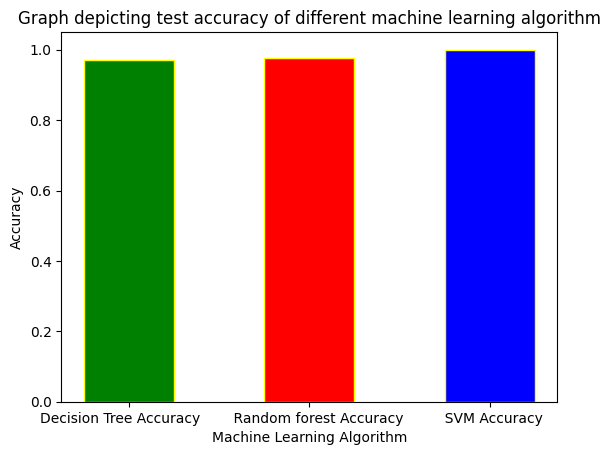

-----------------------------------HealthCare ChatBot-----------------------------------

Your Name? 				->manish
Hello,  manish

Enter the symptom you are experiencing  		->cold
searches related to input: 
0 ) cold_hands_and_feets
Okay. From how many days ? : 0
Are you experiencing any 
back_pain ? : no
weakness_in_limbs ? : yes
neck_pain ? : no
dizziness ? : no
loss_of_balance ? : yes
It might not be that bad but you should take precautions.
You may have  Cervical spondylosis
Cervical spondylosis is a general term for age-related wear and tear affecting the spinal disks in your neck. As the disks dehydrate and shrink, signs of osteoarthritis develop, including bony projections along the edges of bones (bone spurs).
Take following measures : 
1 ) use heating pad or cold pack
2 ) exercise
3 ) take otc pain reliver
4 ) consult doctor
----------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [6]:
from pandas.core.internals.array_manager import array_equals
import re
import pandas as pd
import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import csv
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


training = pd.read_csv('/content/drive/MyDrive/hc/Training.csv')
testing= pd.read_csv('/content/drive/MyDrive/hc/Testing.csv')
cols= training.columns
cols= cols[:-1]
x = training[cols]
y = training['prognosis']
y1= y


reduced_data = training.groupby(training['prognosis']).max()

#mapping strings to numbers
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
testx    = testing[cols]
testy    = testing['prognosis']
testy    = le.transform(testy)


clf1  = DecisionTreeClassifier()
clf = clf1.fit(x_train,y_train)
# print(clf.score(x_train,y_train))
# print ("cross result========")
scores = cross_val_score(clf, x_test, y_test, cv=3)
print (scores)
print("Decision tree accuracy score")
a= scores.mean()
print (scores.mean())

classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)
scores = cross_val_score(clf, x_test, y_test, cv=3)
print (scores)
print("random forest tree accuracy score")
b= scores.mean()
print (scores.mean())

model=SVC()
model.fit(x_train,y_train)
print("for svm: ")
c= model.score(x_test,y_test)
print(model.score(x_test,y_test))

state = ['Decision Tree Accuracy    ','    Random forest Accuracy','  SVM Accuracy']
area = [ a,b,c]
cl=['green','red','blue']
plt.bar(state,area, color=cl, edgecolor= 'yellow',width= 0.5)
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Accuracy')
plt.title('Graph depicting test accuracy of different machine learning algorithm')
plt.show()

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

def readn(nstr):
    engine = pyttsx3.init()

    engine.setProperty('voice', "english+f5")
    engine.setProperty('rate', 130)

    engine.say(nstr)
    engine.runAndWait()
    engine.stop()


severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()

symptoms_dict = {}

for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")


def getDescription():
    global description_list
    with open('/content/drive/MyDrive/hc/symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)




def getSeverityDict():
    global severityDictionary
    with open('/content/drive/MyDrive/hc/Symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass


def getprecautionDict():
    global precautionDictionary
    with open('/content/drive/MyDrive/hc/symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)


def getInfo():
    print("-----------------------------------HealthCare ChatBot-----------------------------------")
    print("\nYour Name? \t\t\t\t",end="->")
    name=input("")
    print("Hello, ",name)

def check_pattern(dis_list,inp):
    pred_list=[]
    inp=inp.replace(' ','_')
    patt = f"{inp}"
    regexp = re.compile(patt)
    pred_list=[item for item in dis_list if regexp.search(item)]
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return 0,[]
def sec_predict(symptoms_exp):
    df = pd.read_csv('/content/drive/MyDrive/hc/Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)

    symptoms_dict = {symptom: index for index, symptom in enumerate(X)}
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
      input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])


def print_disease(node):
    node = node[0]
    val  = node.nonzero()
    disease = le.inverse_transform(val[0])
    return list(map(lambda x:x.strip(),list(disease)))

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []

    while True:

        print("\nEnter the symptom you are experiencing  \t\t",end="->")
        disease_input = input("")
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
            # print("Did you mean: ",cnf_dis,"?(yes/no) :",end="")
            # conf_inp = input("")
            # if(conf_inp=="yes"):
            #     break
        else:
            print("Enter valid symptom.")

    while True:
        try:
            num_days=int(input("Okay. From how many days ? : "))
            break
        except:
            print("Enter valid input.")
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])
            # print( "You may have " +  present_disease )
            red_cols = reduced_data.columns
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]
            # dis_list=list(symptoms_present)
            # if len(dis_list)!=0:
            #     print("symptoms present  " + str(list(symptoms_present)))
            # print("symptoms given "  +  str(list(symptoms_given)) )
            print("Are you experiencing any ")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                inp=""
                print(syms,"? : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp=="yes"):
                    symptoms_exp.append(syms)

            second_prediction=sec_predict(symptoms_exp)
            # print(second_prediction)
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])
                print(description_list[present_disease[0]])

                # readn(f"You may have {present_disease[0]}")
                # readn(f"{description_list[present_disease[0]]}")

            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            # print(description_list[present_disease[0]])
            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                print(i+1,")",j)

            # confidence_level = (1.0*len(symptoms_present))/len(symptoms_given)
            # print("confidence level is " + str(confidence_level))

    recurse(0, 1)
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)
print("----------------------------------------------------------------------------------------")

